It's firmly established science that the Earth is warming, but that does not mean that the warming is uniform in time. I would like to calculate the mean temperature departure for each month to determine if warming has been more significant in some months over others. I will start with one location, but the process can be generalized to multiple locations.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

whitestown = pd.read_csv("C:\csv\whitestownweather.csv")

cols = ['DATE', 'TMAX', 'TMIN']
whitestown = whitestown[cols]
whitestown.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,TMAX,TMIN
0,USC00129557,39.9962,-86.3543,286.8,1901-01-01,20.0,-4.0
1,USC00129557,39.9962,-86.3543,286.8,1901-01-02,21.0,-12.0
2,USC00129557,39.9962,-86.3543,286.8,1901-01-03,28.0,-6.0
3,USC00129557,39.9962,-86.3543,286.8,1901-01-04,40.0,3.0
4,USC00129557,39.9962,-86.3543,286.8,1901-01-05,35.0,18.0


I would first like to group all temperatures from a given month into one row with the TMAX and TMIN columns being the averages for each month. From this we can seperate the data by month and plot each month seperately (I am aware that I can just get monthly temperature data from NWS but I'm practicing here).

In [17]:
whitestown['TIME'] = pd.to_datetime(whitestown['DATE'])
whitestown['MONTH'] = whitestown['TIME'].dt.month
whitestown['YEAR'] = whitestown['TIME'].dt.year

temp_month = whitestown.groupby(['YEAR', 'MONTH']).mean()

temp_month.head()

TMAX       TMIN
YEAR MONTH                      
1901 1      37.064516  16.419355
     2      31.214286  11.357143
     3      47.387097  29.548387
     4      58.600000  35.433333
     5      69.354839  47.225806

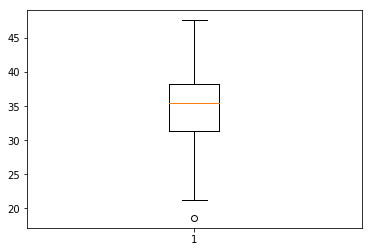

In [46]:
january = whitestown[whitestown["MONTH"] == 1]
january_boxplot = january.groupby('YEAR').mean()
plt.boxplot(january_boxplot['TMAX'])
plt.show()




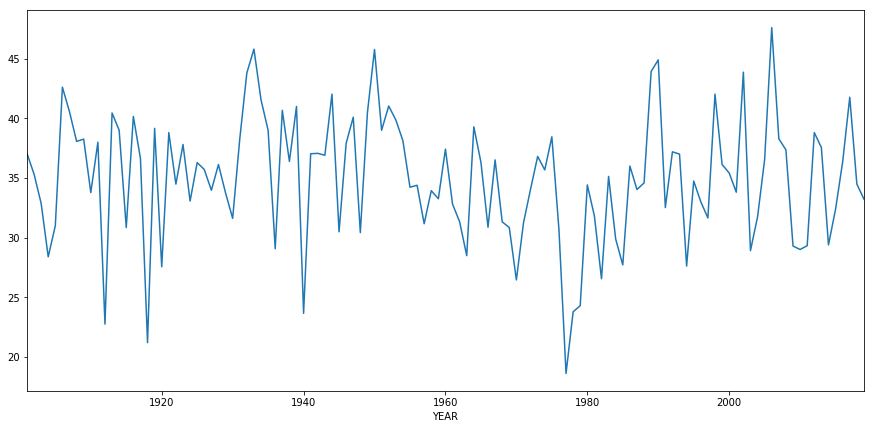

In [47]:
del january['TMIN']
del january['MONTH']
del january['DATE']
del january['TIME']
january.head()

fig, ax = plt.subplots(figsize=(15,7))
january.groupby(['YEAR']).mean()['TMAX'].plot(ax=ax)
